In [1]:
!pip install pandas scikit-learn

In [2]:
!pip install openpyxl

In [3]:
import pandas as pd

In [4]:
data = pd.read_excel('data_problems.xlsx')

data = data[['task', 'topic', 'theory']]

In [5]:
!nvidia-smi

Fri Mar 22 23:17:17 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:01:00.0 Off |                    0 |
| N/A   32C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
!pip install transformers


In [7]:
import os
import pandas as pd
import numpy as np
import shutil
import sys
import tqdm.notebook as tq
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')
import torch
import torch.nn as nn

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [8]:
df_data = data

In [9]:
df_data = df_data.dropna(subset=['theory'])
df_data

,task,topic,theory
754,При каком значении a многочлен P(x) = x1000 +...,Многочлен,1; 2; 3
755,"Докажите, что многочлен P(x) = (x + 1)6 – x6 ...",Многочлен,1; 3
756,При каких a и b многочлен P(x) = (a + b)x5 + ...,Многочлен,1; 2; 3
757,При каких значениях параметра a многочлен P(x...,Многочлен,1; 2; 3
758,При каких a многочлен P(x) = a³x5 + (1 – a)x4...,Многочлен,1; 2; 3
...,...,...,...
2130,Дьявол предлагает Человеку сыграть в следующую...,Дирихле,2; 4; 6
2131,По шоссе в одном направлении едут 10 автомобил...,Дирихле,2; 3; 4
2132,В пространстве имеются 30 ненулевых векторов. ...,Дирихле,2; 4; 6
2133,На плоскости даны две точки A и B. Пусть C – н...,Дирихле,2; 4; 6


In [12]:
import pandas as pd

dirihle = {1: 11, 2: 12, 3: 13, 4: 14, 5: 15, 6: 16, 7: 17, 8: 18}
def replace_values(df_data, dirihle):
    for index, row in df_data.iterrows():
        if row['topic'] == 'Дирихле':
            theory_values = row['theory'].split('; ')
            replaced_values = []
            for value in theory_values:
                value_parts = value.split(', ')
                replaced_parts = []
                for part in value_parts:
                    try:
                        if int(part) in dirihle.keys():
                            replaced_parts.append(str(dirihle[int(part)]))
                        else:
                            replaced_parts.append(part)
                    except ValueError:
                        replaced_parts.append(part)  # Игнорируем значения, которые не могут быть преобразованы в int
                replaced_values.append(', '.join(replaced_parts))
            df_data.at[index, 'theory'] = '; '.join(replaced_values)
    return df_data

df_data = replace_values(df_data, dirihle)

print("\nДанные после замены:")
print(df_data)


Данные после замены:
                                                   task      topic      theory
754   При каком значении a многочлен  P(x) = x1000 +...  Многочлен     1; 2; 3
755   Докажите, что многочлен  P(x) = (x + 1)6 – x6 ...  Многочлен        1; 3
756   При каких a и b многочлен  P(x) = (a + b)x5 + ...  Многочлен     1; 2; 3
757   При каких значениях параметра a многочлен  P(x...  Многочлен     1; 2; 3
758   При каких a многочлен  P(x) = a³x5 + (1 – a)x4...  Многочлен     1; 2; 3
...                                                 ...        ...         ...
2130  Дьявол предлагает Человеку сыграть в следующую...    Дирихле  12; 14; 16
2131  По шоссе в одном направлении едут 10 автомобил...    Дирихле  12; 13; 14
2132  В пространстве имеются 30 ненулевых векторов. ...    Дирихле  12; 14; 16
2133  На плоскости даны две точки A и B. Пусть C – н...    Дирихле  12; 14; 16
2134  На плоскости нарисованы неравнобедренный треуг...    Дирихле  12; 14; 16

[1378 rows x 3 columns]


In [13]:
import pandas as pd

mnogo = {1: 49, 2: 50, 3: 51, 4: 52, 5: 53, 6: 54, 7: 55, 8: 56, 9: 57}
def replace_values(df_data, mnogo):
    for index, row in df_data.iterrows():
        if row['topic'] == 'Многочлен':
            theory_values = row['theory'].split('; ')
            replaced_values = []
            for value in theory_values:
                value_parts = value.split(', ')
                replaced_parts = []
                for part in value_parts:
                    try:
                        if int(part) in mnogo.keys():
                            replaced_parts.append(str(mnogo[int(part)]))
                        else:
                            replaced_parts.append(part)
                    except ValueError:
                        replaced_parts.append(part)
                replaced_values.append(', '.join(replaced_parts))
            df_data.at[index, 'theory'] = '; '.join(replaced_values)
    return df_data

df_data = replace_values(df_data, mnogo)

print("\nДанные после замены:")
print(df_data)


Данные после замены:
                                                   task      topic      theory
754   При каком значении a многочлен  P(x) = x1000 +...  Многочлен  49; 50; 51
755   Докажите, что многочлен  P(x) = (x + 1)6 – x6 ...  Многочлен      49; 51
756   При каких a и b многочлен  P(x) = (a + b)x5 + ...  Многочлен  49; 50; 51
757   При каких значениях параметра a многочлен  P(x...  Многочлен  49; 50; 51
758   При каких a многочлен  P(x) = a³x5 + (1 – a)x4...  Многочлен  49; 50; 51
...                                                 ...        ...         ...
2130  Дьявол предлагает Человеку сыграть в следующую...    Дирихле  12; 14; 16
2131  По шоссе в одном направлении едут 10 автомобил...    Дирихле  12; 13; 14
2132  В пространстве имеются 30 ненулевых векторов. ...    Дирихле  12; 14; 16
2133  На плоскости даны две точки A и B. Пусть C – н...    Дирихле  12; 14; 16
2134  На плоскости нарисованы неравнобедренный треуг...    Дирихле  12; 14; 16

[1378 rows x 3 columns]


In [16]:
terchisel = {1: 19, 2: 20, 3: 21, 4: 22, 5: 23, 6: 24, 7: 25, 8: 26, 9: 27}
def replace_values(df_data, terchisel):
    for index, row in df_data.iterrows():
        if row['topic'] == 'Теория чисел':
            theory_values = row['theory'].split('; ')
            replaced_values = []
            for value in theory_values:
                value_parts = value.split(', ')
                replaced_parts = []
                for part in value_parts:
                    try:
                        if int(part) in terchisel.keys():
                            replaced_parts.append(str(terchisel[int(part)]))
                        else:
                            replaced_parts.append(part)
                    except ValueError:
                        replaced_parts.append(part)
                replaced_values.append(', '.join(replaced_parts))
            df_data.at[index, 'theory'] = '; '.join(replaced_values)
    return df_data

df_data = replace_values(df_data, terchisel)

print("\nДанные после замены:")
df_data


Данные после замены:


,task,topic,theory
754,При каком значении a многочлен P(x) = x1000 +...,Многочлен,49; 50; 51
755,"Докажите, что многочлен P(x) = (x + 1)6 – x6 ...",Многочлен,49; 51
756,При каких a и b многочлен P(x) = (a + b)x5 + ...,Многочлен,49; 50; 51
757,При каких значениях параметра a многочлен P(x...,Многочлен,49; 50; 51
758,При каких a многочлен P(x) = a³x5 + (1 – a)x4...,Многочлен,49; 50; 51
...,...,...,...
2130,Дьявол предлагает Человеку сыграть в следующую...,Дирихле,12; 14; 16
2131,По шоссе в одном направлении едут 10 автомобил...,Дирихле,12; 13; 14
2132,В пространстве имеются 30 ненулевых векторов. ...,Дирихле,12; 14; 16
2133,На плоскости даны две точки A и B. Пусть C – н...,Дирихле,12; 14; 16


In [17]:
komba = {1: 28, 2: 29, 3: 30, 4: 31, 5: 32, 6: 33, 7: 34, 8: 35, 9: 36}
def replace_values(df_data, komba):
    for index, row in df_data.iterrows():
        if row['topic'] == 'Комбинаторика':
            theory_values = row['theory'].split('; ')
            replaced_values = []
            for value in theory_values:
                value_parts = value.split(', ')
                replaced_parts = []
                for part in value_parts:
                    try:
                        if int(part) in komba.keys():
                            replaced_parts.append(str(komba[int(part)]))
                        else:
                            replaced_parts.append(part)
                    except ValueError:
                        replaced_parts.append(part)
                replaced_values.append(', '.join(replaced_parts))
            df_data.at[index, 'theory'] = '; '.join(replaced_values)
    return df_data

df_data = replace_values(df_data, komba)

print("\nДанные после замены:")
print(df_data)


Данные после замены:
                                                   task      topic      theory
754   При каком значении a многочлен  P(x) = x1000 +...  Многочлен  49; 50; 51
755   Докажите, что многочлен  P(x) = (x + 1)6 – x6 ...  Многочлен      49; 51
756   При каких a и b многочлен  P(x) = (a + b)x5 + ...  Многочлен  49; 50; 51
757   При каких значениях параметра a многочлен  P(x...  Многочлен  49; 50; 51
758   При каких a многочлен  P(x) = a³x5 + (1 – a)x4...  Многочлен  49; 50; 51
...                                                 ...        ...         ...
2130  Дьявол предлагает Человеку сыграть в следующую...    Дирихле  12; 14; 16
2131  По шоссе в одном направлении едут 10 автомобил...    Дирихле  12; 13; 14
2132  В пространстве имеются 30 ненулевых векторов. ...    Дирихле  12; 14; 16
2133  На плоскости даны две точки A и B. Пусть C – н...    Дирихле  12; 14; 16
2134  На плоскости нарисованы неравнобедренный треуг...    Дирихле  12; 14; 16

[1378 rows x 3 columns]


In [19]:
inv = {1: 37, 2: 38, 3: 39, 4: 40, 5: 41, 6: 42, 7: 43, 8: 44, 9: 45, 10: 46, 11: 47, 12: 48}
def replace_values(df_data, inv):
    for index, row in df_data.iterrows():
        if row['topic'] == 'Инвариант':
            theory_values = row['theory'].split('; ')
            replaced_values = []
            for value in theory_values:
                value_parts = value.split(', ')
                replaced_parts = []
                for part in value_parts:
                    try:
                        if int(part) in inv.keys():
                            replaced_parts.append(str(inv[int(part)]))
                        else:
                            replaced_parts.append(part)
                    except ValueError:
                        replaced_parts.append(part)
                replaced_values.append(', '.join(replaced_parts))
            df_data.at[index, 'theory'] = '; '.join(replaced_values)
    return df_data

df_data = replace_values(df_data, inv)

print("\nДанные после замены:")
print(df_data)


Данные после замены:
                                                   task      topic      theory
754   При каком значении a многочлен  P(x) = x1000 +...  Многочлен  49; 50; 51
755   Докажите, что многочлен  P(x) = (x + 1)6 – x6 ...  Многочлен      49; 51
756   При каких a и b многочлен  P(x) = (a + b)x5 + ...  Многочлен  49; 50; 51
757   При каких значениях параметра a многочлен  P(x...  Многочлен  49; 50; 51
758   При каких a многочлен  P(x) = a³x5 + (1 – a)x4...  Многочлен  49; 50; 51
...                                                 ...        ...         ...
2130  Дьявол предлагает Человеку сыграть в следующую...    Дирихле  12; 14; 16
2131  По шоссе в одном направлении едут 10 автомобил...    Дирихле  12; 13; 14
2132  В пространстве имеются 30 ненулевых векторов. ...    Дирихле  12; 14; 16
2133  На плоскости даны две точки A и B. Пусть C – н...    Дирихле  12; 14; 16
2134  На плоскости нарисованы неравнобедренный треуг...    Дирихле  12; 14; 16

[1378 rows x 3 columns]


In [24]:
df_data["combined"] = df_data["task"] + ". " + df_data["topic"]
df_data.drop(columns=["topic", "task"], axis=1, inplace=True)

In [25]:
df_data

,theory,combined
754,49; 50; 51,При каком значении a многочлен P(x) = x1000 +...
755,49; 51,"Докажите, что многочлен P(x) = (x + 1)6 – x6 ..."
756,49; 50; 51,При каких a и b многочлен P(x) = (a + b)x5 + ...
757,49; 50; 51,При каких значениях параметра a многочлен P(x...
758,49; 50; 51,При каких a многочлен P(x) = a³x5 + (1 – a)x4...
...,...,...
2130,12; 14; 16,Дьявол предлагает Человеку сыграть в следующую...
2131,12; 13; 14,По шоссе в одном направлении едут 10 автомобил...
2132,12; 14; 16,В пространстве имеются 30 ненулевых векторов. ...
2133,12; 14; 16,На плоскости даны две точки A и B. Пусть C – н...


In [26]:
df_data = df_data.dropna(subset=['theory'])

In [27]:
for i in range(1, 57):
  df_data[str(i)] = 0

for i in range(1, 57):
  df_data[str(i)] = df_data.theory.apply(lambda x: int(str(i) in x))

In [14]:
df_data.drop(columns=['theory'], inplace=True)

In [28]:
df_data

,theory,combined,1,2,3,4,5,6,7,8,...,47,48,49,50,51,52,53,54,55,56
754,49; 50; 51,При каком значении a многочлен P(x) = x1000 +...,1,0,0,1,1,0,0,0,...,0,0,1,1,1,0,0,0,0,0
755,49; 51,"Докажите, что многочлен P(x) = (x + 1)6 – x6 ...",1,0,0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
756,49; 50; 51,При каких a и b многочлен P(x) = (a + b)x5 + ...,1,0,0,1,1,0,0,0,...,0,0,1,1,1,0,0,0,0,0
757,49; 50; 51,При каких значениях параметра a многочлен P(x...,1,0,0,1,1,0,0,0,...,0,0,1,1,1,0,0,0,0,0
758,49; 50; 51,При каких a многочлен P(x) = a³x5 + (1 – a)x4...,1,0,0,1,1,0,0,0,...,0,0,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,12; 14; 16,Дьявол предлагает Человеку сыграть в следующую...,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2131,12; 13; 14,По шоссе в одном направлении едут 10 автомобил...,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2132,12; 14; 16,В пространстве имеются 30 ненулевых векторов. ...,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2133,12; 14; 16,На плоскости даны две точки A и B. Пусть C – н...,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
from sklearn.model_selection import train_test_split

# split into train and test
df_train, df_test = train_test_split(df_data, random_state=77, test_size=0.30, shuffle=True)
# split test into test and validation datasets
df_test, df_valid = train_test_split(df_test, random_state=88, test_size=0.50, shuffle=True)

In [30]:
print(f"Train: {df_train.shape}, Test: {df_test.shape}, Valid: {df_valid.shape}")

Train: (964, 58), Test: (207, 58), Valid: (207, 58)


In [31]:
df_cleaned = df_data.dropna()

In [32]:
# split into train and test
df_train, df_test = train_test_split(df_data, random_state=77, test_size=0.30, shuffle=True)
# split test into test and validation datasets
df_test, df_valid = train_test_split(df_test, random_state=88, test_size=0.50, shuffle=True)

In [33]:
print(f"Train: {df_train.shape}, Test: {df_test.shape}, Valid: {df_valid.shape}")

Train: (964, 58), Test: (207, 58), Valid: (207, 58)


In [34]:
# Hyperparameters
MAX_LEN = 256
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 8
TEST_BATCH_SIZE = 8
EPOCHS = 15
LEARNING_RATE = 1e-05
THRESHOLD = 0.5 # threshold for the sigmoid

In [35]:
from transformers import BertTokenizer, BertModel

In [36]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [37]:
# Test the tokenizer
test_text = "We are testing BERT tokenizer."
# generate encodings
encodings = tokenizer.encode_plus(test_text,
                                  add_special_tokens = True,
                                  max_length = 50,
                                  truncation = True,
                                  padding = "max_length",
                                  return_attention_mask = True,
                                  return_tensors = "pt")
# we get a dictionary with three keys (see: https://huggingface.co/transformers/glossary.html)
encodings

{'input_ids': tensor([[  101,  2057,  2024,  5604, 14324, 19204, 17629,  1012,   102,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]])}

In [38]:
df_data

,theory,combined,1,2,3,4,5,6,7,8,...,47,48,49,50,51,52,53,54,55,56
754,49; 50; 51,При каком значении a многочлен P(x) = x1000 +...,1,0,0,1,1,0,0,0,...,0,0,1,1,1,0,0,0,0,0
755,49; 51,"Докажите, что многочлен P(x) = (x + 1)6 – x6 ...",1,0,0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
756,49; 50; 51,При каких a и b многочлен P(x) = (a + b)x5 + ...,1,0,0,1,1,0,0,0,...,0,0,1,1,1,0,0,0,0,0
757,49; 50; 51,При каких значениях параметра a многочлен P(x...,1,0,0,1,1,0,0,0,...,0,0,1,1,1,0,0,0,0,0
758,49; 50; 51,При каких a многочлен P(x) = a³x5 + (1 – a)x4...,1,0,0,1,1,0,0,0,...,0,0,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,12; 14; 16,Дьявол предлагает Человеку сыграть в следующую...,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2131,12; 13; 14,По шоссе в одном направлении едут 10 автомобил...,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2132,12; 14; 16,В пространстве имеются 30 ненулевых векторов. ...,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2133,12; 14; 16,На плоскости даны две точки A и B. Пусть C – н...,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df_train['combined']

1025    В углы B и C треугольника ABC вписаны две окру...
1922    Совет из 2000 депутатов решил утвердить госуда...
2070    а) Группа людей прошла опрос, состоящий из 20 ...
1612    Даны числа 1, 2, ..., N, каждое из которых окр...
1928    Учитель заполнил клетчатую таблицу 5×5 различн...
                              ...                        
1684     На шахматную доску произвольным образом уложи...
2074    В Академии Наук 999 академиков. Каждая научная...
990     Дан квадратный трёхчлен  f(x) = x² + ax + b.  ...
1363    В почтовом отделении продаются открытки 10 вид...
1484    Докажите, что \n   а)  241 + 1  делится на 83;...
Name: combined, Length: 964, dtype: object

In [40]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, df, tokenizer, max_len, target_list):
        self.tokenizer = tokenizer
        self.df = df
        self.title = list(df['combined'])
        self.targets = self.df[target_list].values
        self.max_len = max_len

    def __len__(self):
        return len(self.title)

    def __getitem__(self, index):
        title = str(self.title[index])
        title = " ".join(title.split())
        inputs = self.tokenizer.encode_plus(
            title,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_token_type_ids=True,
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': inputs['input_ids'].flatten(),
            'attention_mask': inputs['attention_mask'].flatten(),
            'token_type_ids': inputs["token_type_ids"].flatten(),
            'targets': torch.FloatTensor(self.targets[index]),
            'title': title
        }


In [43]:
del target_list[:2]

In [45]:
train_dataset = CustomDataset(df_train, tokenizer, MAX_LEN, target_list)
valid_dataset = CustomDataset(df_valid, tokenizer, MAX_LEN, target_list)
test_dataset = CustomDataset(df_test, tokenizer, MAX_LEN, target_list)

In [46]:
train_dataset = CustomDataset(df_train, tokenizer, MAX_LEN, target_list)
train_dataset

In [47]:
df_train.combined.iloc[0]

'В углы B и C треугольника ABC вписаны две окружности \nрадиусов 2 и 3, касающиеся биссектрисы угла A треугольника. \nНайдите эту биссектрису, если расстояние между точками, в которых окружности касаются BC, равно 7. . Многочлен'

In [48]:
# testing the dataset
next(iter(train_dataset))

{'input_ids': tensor([  101,  1182,  1198, 29741, 29436, 29113,  1038,  1188,  1039,  1197,
         16856, 15290, 29748, 29741, 14150, 29436, 23742, 18947, 10325, 28598,
          5925,  1182, 29746, 10325, 29747, 28995, 29113,  1184, 25529, 15290,
          1193, 23925, 16856, 29748, 29743, 18947, 14150, 29747, 22919, 10325,
          1195, 10260, 29742, 10325, 29748, 29747, 19259,  1016,  1188,  1017,
          1010,  1189, 10260, 29747, 10260, 29757, 29754, 10325, 15290, 29747,
         17432,  1181, 10325, 29747, 29747, 15290, 23925, 22919, 16856, 10325,
         29747, 29113,  1198, 29741, 29436, 10260,  1037,  1197, 16856, 15290,
         29748, 29741, 14150, 29436, 23742, 18947, 10325, 28598,  1012,  1192,
         10260, 10325, 29742, 10325, 22919, 15290,  1208, 22919, 29748,  1181,
         10325, 29747, 29747, 15290, 23925, 22919, 16856, 10325, 29747, 29748,
          1010,  1185, 29747, 29436, 10325,  1195, 10260, 29747, 29747, 22919,
         14150, 17432, 18947, 10325, 15

In [49]:
# Data loaders
train_data_loader = torch.utils.data.DataLoader(train_dataset,
    batch_size=TRAIN_BATCH_SIZE,
    shuffle=True,
    num_workers=0
)

val_data_loader = torch.utils.data.DataLoader(valid_dataset,
    batch_size=VALID_BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

test_data_loader = torch.utils.data.DataLoader(test_dataset,
    batch_size=TEST_BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

In [59]:
class BERTClass(torch.nn.Module):
    def __init__(self):
        super(BERTClass, self).__init__()
        self.bert_model = BertModel.from_pretrained('bert-base-uncased', return_dict=True)
        self.dropout = torch.nn.Dropout(0.3)
        self.linear = torch.nn.Linear(768, 56)

    def forward(self, input_ids, attn_mask, token_type_ids):
        output = self.bert_model(
            input_ids,
            attention_mask=attn_mask,
            token_type_ids=token_type_ids
        )
        output_dropout = self.dropout(output.pooler_output)
        output = self.linear(output_dropout)
        return output

model = BERTClass()

# # Freezing BERT layers: (tested, weaker convergence)
# for param in model.bert_model.parameters():
#     param.requires_grad = False

model.to(device)

BERTClass(
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_a

In [51]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

In [52]:
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(), lr = 1e-5)

In [60]:
def train_model(training_loader, model, optimizer):
    losses = []
    correct_predictions = 0
    num_samples = 0
    f1_scores = []
    # set model to training mode (activate droput, batch norm)
    model.train()
    # initialize the progress bar
    loop = tq.tqdm(enumerate(training_loader), total=len(training_loader),
                      leave=True, colour='steelblue')
    for batch_idx, data in loop:
        ids = data['input_ids'].to(device, dtype = torch.long)
        mask = data['attention_mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)

        # forward
        outputs = model(ids, mask, token_type_ids) # (batch,predict)=(32,8)
        loss = loss_fn(outputs, targets)
        losses.append(loss.item())
        # training accuracy, apply sigmoid, round (apply thresh 0.5)
        outputs = torch.sigmoid(outputs).cpu().detach().numpy().round()
        targets = targets.cpu().detach().numpy()
        correct_predictions += np.sum(outputs==targets)
        num_samples += targets.size   # total number of elements in the 2D array
        
        # F1 score
        f1 = f1_score(targets.flatten(), outputs.flatten())
        f1_scores.append(f1)

        # backward
        optimizer.zero_grad()
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        # grad descent step
        optimizer.step()

        # Update progress bar
        #loop.set_description(f"")
        #loop.set_postfix(batch_loss=loss)

    # returning: trained model, model accuracy, mean loss
    return model, float(correct_predictions)/num_samples, np.mean(losses), np.mean(f1_scores)

In [54]:
from sklearn.metrics import f1_score

In [61]:
def eval_model(validation_loader, model, optimizer):
    losses = []
    correct_predictions = 0
    num_samples = 0
    f1_scores = []

    # set model to eval mode (turn off dropout, fix batch norm)
    model.eval()

    with torch.no_grad():
        for batch_idx, data in enumerate(validation_loader, 0):
            ids = data['input_ids'].to(device, dtype=torch.long)
            mask = data['attention_mask'].to(device, dtype=torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype=torch.long)
            targets = data['targets'].to(device, dtype=torch.float)
            outputs = model(ids, mask, token_type_ids)

            loss = loss_fn(outputs, targets)
            losses.append(loss.item())

            # validation accuracy
            outputs = torch.sigmoid(outputs).cpu().detach().numpy().round()
            targets = targets.cpu().detach().numpy()
            correct_predictions += np.sum(outputs == targets)
            num_samples += targets.size   # total number of elements in the 2D array
            
            # F1 score
            f1 = f1_score(targets.flatten(), outputs.flatten())
            f1_scores.append(f1)

    return float(correct_predictions) / num_samples, np.mean(losses), np.mean(f1_scores)


In [56]:
from collections import defaultdict

In [57]:
df_data

,theory,combined,1,2,3,4,5,6,7,8,...,47,48,49,50,51,52,53,54,55,56
754,49; 50; 51,При каком значении a многочлен P(x) = x1000 +...,1,0,0,1,1,0,0,0,...,0,0,1,1,1,0,0,0,0,0
755,49; 51,"Докажите, что многочлен P(x) = (x + 1)6 – x6 ...",1,0,0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
756,49; 50; 51,При каких a и b многочлен P(x) = (a + b)x5 + ...,1,0,0,1,1,0,0,0,...,0,0,1,1,1,0,0,0,0,0
757,49; 50; 51,При каких значениях параметра a многочлен P(x...,1,0,0,1,1,0,0,0,...,0,0,1,1,1,0,0,0,0,0
758,49; 50; 51,При каких a многочлен P(x) = a³x5 + (1 – a)x4...,1,0,0,1,1,0,0,0,...,0,0,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,12; 14; 16,Дьявол предлагает Человеку сыграть в следующую...,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2131,12; 13; 14,По шоссе в одном направлении едут 10 автомобил...,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2132,12; 14; 16,В пространстве имеются 30 ненулевых векторов. ...,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2133,12; 14; 16,На плоскости даны две точки A и B. Пусть C – н...,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
!pip install ipywidgets --upgrade

In [47]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager


(Deprecated) Installing extensions with the jupyter labextension install command is now deprecated and will be removed in a future major version of JupyterLab.

Users should manage prebuilt extensions with package managers like pip and conda, and extension authors are encouraged to distribute their extensions as prebuilt packages 
/usr/local/lib/python3.10/dist-packages/jupyterlab/debuglog.py:56: UserWarning: An error occurred.
  warnings.warn("An error occurred.")
/usr/local/lib/python3.10/dist-packages/jupyterlab/debuglog.py:57: UserWarning: ValueError: Please install Node.js and npm before continuing installation. You may be able to install Node.js from your package manager, from conda, or directly from the Node.js website (https://nodejs.org).
  warnings.warn(msg[-1].strip())
/usr/local/lib/python3.10/dist-packages/jupyterlab/debuglog.py:58: UserWarning: See the log file for details: /tmp/jupyterlab-debug-r3bl8ime.log
  warnings.warn(f"See the log file for details: {log_path!s}")


In [62]:
history = defaultdict(list)
best_accuracy = 0
best_f1 = 0

for epoch in range(1, EPOCHS+1):
    print(f'Epoch {epoch}/{EPOCHS}')
    model, train_acc, train_loss, train_f1 = train_model(train_data_loader, model, optimizer)
    val_acc, val_loss, val_f1 = eval_model(val_data_loader, model, optimizer)

    print(f'train_loss={train_loss:.4f}, val_loss={val_loss:.4f} train_acc={train_acc:.4f}, val_loss={val_loss:.4f} train_f1={train_f1:.4f}, val_acc={val_acc:.4f}, val_f1={val_f1:.4f}')

    history['train_acc'].append(train_acc)
    history['train_f1'].append(train_f1)
    history['train_loss'].append(train_loss)
    
    history['val_acc'].append(val_acc)
    history['val_f1'].append(val_f1)
    history['val_loss'].append(val_loss)
    # save the best model
    if val_acc > best_accuracy:
        torch.save(model.state_dict(), os.path.join("Bert_tune","output","MLTC_model_state.bin"))
        best_accuracy = val_acc
    if val_f1 > best_f1:
        best_f1 = val_f1

Epoch 1/15


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.7303, val_loss=0.7250 train_acc=0.4733, val_loss=0.7250 train_f1=0.1703, val_acc=0.4623, val_f1=0.1833
Epoch 2/15


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.7301, val_loss=0.7250 train_acc=0.4748, val_loss=0.7250 train_f1=0.1726, val_acc=0.4623, val_f1=0.1833
Epoch 3/15


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.7303, val_loss=0.7250 train_acc=0.4718, val_loss=0.7250 train_f1=0.1694, val_acc=0.4623, val_f1=0.1833
Epoch 4/15


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.7302, val_loss=0.7250 train_acc=0.4764, val_loss=0.7250 train_f1=0.1728, val_acc=0.4623, val_f1=0.1833
Epoch 5/15


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.7304, val_loss=0.7250 train_acc=0.4731, val_loss=0.7250 train_f1=0.1734, val_acc=0.4623, val_f1=0.1833
Epoch 6/15


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.7298, val_loss=0.7250 train_acc=0.4757, val_loss=0.7250 train_f1=0.1738, val_acc=0.4623, val_f1=0.1833
Epoch 7/15


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.7312, val_loss=0.7250 train_acc=0.4710, val_loss=0.7250 train_f1=0.1712, val_acc=0.4623, val_f1=0.1833
Epoch 8/15


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.7305, val_loss=0.7250 train_acc=0.4742, val_loss=0.7250 train_f1=0.1722, val_acc=0.4623, val_f1=0.1833
Epoch 9/15


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.7306, val_loss=0.7250 train_acc=0.4733, val_loss=0.7250 train_f1=0.1701, val_acc=0.4623, val_f1=0.1833
Epoch 10/15


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.7304, val_loss=0.7250 train_acc=0.4722, val_loss=0.7250 train_f1=0.1704, val_acc=0.4623, val_f1=0.1833
Epoch 11/15


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.7303, val_loss=0.7250 train_acc=0.4735, val_loss=0.7250 train_f1=0.1717, val_acc=0.4623, val_f1=0.1833
Epoch 12/15


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.7303, val_loss=0.7250 train_acc=0.4720, val_loss=0.7250 train_f1=0.1721, val_acc=0.4623, val_f1=0.1833
Epoch 13/15


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.7297, val_loss=0.7250 train_acc=0.4747, val_loss=0.7250 train_f1=0.1729, val_acc=0.4623, val_f1=0.1833
Epoch 14/15


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.7301, val_loss=0.7250 train_acc=0.4762, val_loss=0.7250 train_f1=0.1716, val_acc=0.4623, val_f1=0.1833
Epoch 15/15


  0%|          | 0/121 [00:00<?, ?it/s]

train_loss=0.7302, val_loss=0.7250 train_acc=0.4757, val_loss=0.7250 train_f1=0.1743, val_acc=0.4623, val_f1=0.1833


In [ ]:
transcript = {1: 'выделение полного квадрата в выраженияз оценки, помогает легче оценить величину',
              2: 'рассмотреть частные случаи по типу простых чисел в о+п + теория чисел или разбор крайних случаев которые спрятаны в формулировке условия, например: ввести оси координат и рассмотерть точку с самыми большими координатми оси x, y',
              3: 'Принцип крайнего, рассмотреть самое большое или самое маленькое число или объект, применяется когда объекты находятся в каком-то порядке и наблюдается некая симметрия в их расположении, например числа стоят по кругу или в ряд',
              4: 'Идеи на досках, шахматная раскраска + другие раскраски, подсчёт шагов фигур. поворот доски на 90, 45 и другие градусы. Раскраски по 3, 4, 5 и так далее цветов.',
              5: 'Вспомогательные площади, которые могут решить вопрос наименьшее или максимальное количество, разделить площадь на более маленькие.',
              6: 'Вспомогательный периметр, из-за соображений значение периметра можно ответить на множество вопросов, сколько фигур максимум можно положить в другую',
              7: 'Формула пика может помочь решить задачу через подсчёт площади с помощью клеточек, в некоторых задачах на клеточной доске основная идея решения.',
              8: 'Упорядочивание и перестановка предметов по отношению к другим',
              9: 'Разбить фигуру на части, несамопересикающиеся или пересекающиеся, в каждую часть поместить фигуры из условия.',
              10: 'Двойной подсчёт посчитать одной формулой и другой, потом прировнять и оценить верхнии и нижнии оценки',
              11: 'Подсчёт двумя способами, посчитать одной формулой и другой, потом прировнять их, потому что считают одну и ту же группу элементов.',
              12: 'Посчитать принципом дирихле, что означает остаток по модулю того что мы считаем на то что мы делим в совокупности с размещением элементов по группам.',
              13: 'Принцип дирихле в графах и наоборот, граф может понять что от нас хотят в условии и решить задачу на принцип дирихле.',
              14: 'Разбиение большой группы на более маленькие и применять несколько раз принцип дирихле.',
              15: 'Дирихле в тч, найти простой модуль который может помочь в решении',
              16: 'Метод на координатной плоскости, конечное точек на прямой, принцип дирихле в геометрии и на плоскости с осям',
              17: 'Принцип дирихле через площади, методы оценки площади и количества фигур с одинаковой площадью',
              18: 'Дирихле на доске, объекты в клетках доски, обозначит за клетки объекты доски, а за кроликов шахматные фигуры или комбинацию фигур и посчиать всевозможные состояния их нахождения на доске',
              19: 'Делимость, рассмотерть разыне модули и чётность',
              20: 'Чётность и нечётность, помогает когда в задаче проверяется уравнение которое не подходит просто потому что одно число делится на 2 а другое нет, также чётность это хороший цикл с длиной 2, то есть все объекты могут чередоваться по чётности.',
              21: 'Циклы остатков по модулю, иногда циклы очень помогают решат задачи где какое-то число возведено в очень большую степень или нет возможности явно посчитать остаток по сложному модолю.',
              22: 'простой модуль, ведь извостно что простые числа не имеют собственных делителей, поэтому с простым делителем никогда не бывает проблем, ведь у простого числа и любого числа наибольший делитель, либо 1, либо сам простой делитель, что очень удобно при решении задач по модулю.',
              23: 'хорошая степень числа, которая близко похожа на простое число, тогда стоит применить малую теорему ферма, которая очень помогает при рещении задачи, с помощью неё можно заменить сложную степень на 1, это число более лёгкое чем степень',
              24: 'Степень простых чисел, степень остатков',
              25: 'Теорема вильсона для факториала простого числа, ведь он всегда равен 1, значит с ним удобно оперировать, без проблем умножать, а это очень сильно помогает в задачах на делимость',
              26: 'Произведение остатков и их сумма',
              27: 'Замена + упрощение, иногда удобно просто заменить одно число на другое по модулю, ведь оно может замениться на 0 или 1 и тогда можно возводить в большие степени или складывать числа по модулю',
              28: 'Формула 2^n которая описывает идею взять или не взять в выборку предмета, или k^n, где каждый предмет мы берём k раз.',
              29: 'Формула A из n по k, которая описывает, как можно брать предметов и сколько их, то есть из группы из n объектов нужно взять k но мы можем повторятся, рассчитывается по формуле: n!/(n-k)!',
              30: 'Число сочетаний: C из n по k, описывает идею выбора из n элементов, k элементов.',
              31: 'P от k = k! помогает посчитать сколько вариантов перестановок есть среди k элементов без повтора, может явно не применятся, но сама идея очень полезна, также стоит поробывать комбинировать Р с чилом сочитаний или размещений.',
              32: 'метод шаров и перегородок, помогает в решении задач, когда есть ряд одинаковых элементов и их надо распределить в несколько групп, которые отличаются друг от друга. Формула C из (n+k-1) по (k-1)',
              33: 'метод шаров и перегородок но уже без пустых множеств, рассчитывается: C из (n-1) по (k-1).',
              34: 'Комбинация нескольких методов подсчёта, метод группировки.',
              35: 'Правило суммы, когда несколько значений способов выбрать тот или иной объект складываются между собой.',
              36: 'Правило произведения, когда несколько способов выбрать тот или иной объект перемножаются между собой.',
              37: 'Сумма объектов, сказать что сумма объектов никогда не меняется с каждым шагом, применяется когда шаг в условие связан с суммой объектов.',
              38: 'Произведение всех объектов, помогает когда шаг в задаче связан с умножением чисел',
              39: 'Инвариант, когда какая-то величина (сумма или произведение), не меняется никогда при шаге из условия',
              40: 'Чётность или нечётность величины, которая никогда не меняется или чередуется с постоянным циклом.',
              41: 'Инвариант в геометрических или абстрактных задачах, когда за инвариант нужно рассмотреть расстояние от точки до прямой, где при повороте или перемещении оно не изменяется',
              42: 'Инвариант в абстрактных задачах, найти инвариант при упорядочивании, где порядок не меняется с изменением количества объектов',
              43: 'Рассмотреть граф связей и найти инвариант для рёбер или вершин, или же для степеней каждой вершины',
              44: 'Инвариант в графах, изменение количества вершин и рёбер не меняет чётность степени определённых вершин',
              45: 'Усреднить величины, числа. Рассмотреть как меняется среднее арифметическое и так далее.',
              46: 'Инвариант на досках, чётность и нечётность клеток одного цвета, чередование клеток разного цвета',
              47: 'Полуинвариант, когда какая-то величина (сумма или произведение), только уменьшается или только увеличивается',
              48: 'Инвариант при разбиении на менее маленькие части',
              49: 'Теорема Безу, используется если в задаче есть слова: остаток многочлена на другой многочлен или разложить на скобки многочлен',
              50: 'Разложить многочлен на скобки вида: a(x-x1)...(x-xn), где a -коэффициент, а  x1...xn - корни многочлена',
              51: 'Найти корни и прировнять к нулю или подставить вместо x - различные числа из условия',
              52: 'Найти полный квадрат, куб и так далее.',
              53: 'Найти максимум или минимум функции.',
              54: 'рассмотреть гомотетию графика с хорошим коэффициентом.',
              55: 'анализировать граф как он устроен и расположен на осях.',
              56: 'Использовать касательные или производную либо предел функций'}

In [70]:
model_to_save = model.module if hasattr(model, 'module') else model 
model_to_save.save_pretrained('Bert_tune/output')

AttributeError: 'BERTClass' object has no attribute 'save_pretrained'

In [71]:
config = model.bert_model.config

In [72]:
import json

config_dict = config.to_dict()

with open("config.json", "w") as config_file:
    json.dump(config_dict, config_file)

In [75]:
import os
import json

config_dict = config.to_dict()

config_file_path = os.path.join("Bert_tune/output", "config.json")
with open(config_file_path, "w") as config_file:
    json.dump(config_dict, config_file)

In [73]:
model = BertForSequenceClassification.from_pretrained('Bert_tune/output')

OSError: Bert_tune/output does not appear to have a file named config.json. Checkout 'https://huggingface.co/Bert_tune/output/tree/main' for available files.

In [49]:
!pip install matplotlib

In [50]:
import matplotlib.pyplot as plt

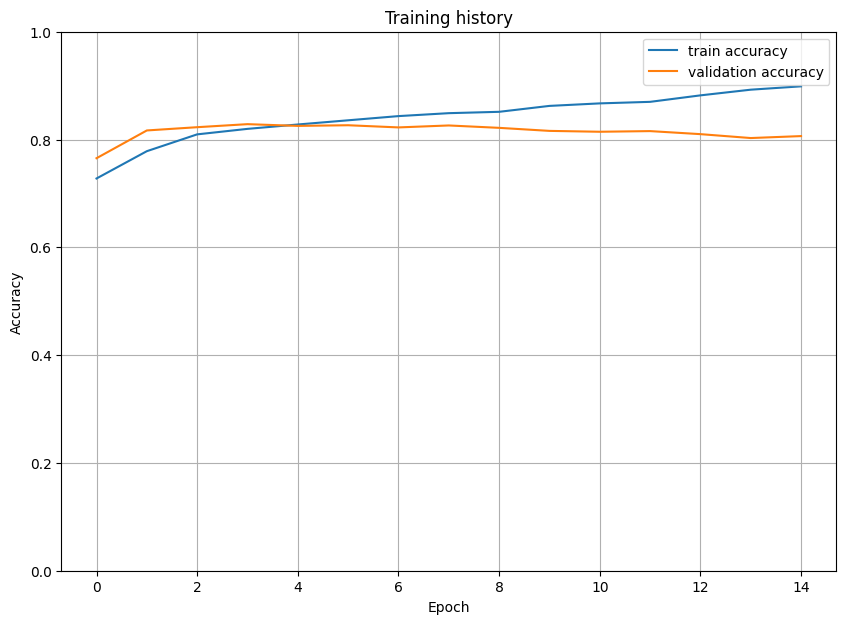

In [51]:
plt.rcParams["figure.figsize"] = (10,7)
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);
plt.grid()

In [52]:
# Loading pretrained model (best model)
model = BERTClass()
model.load_state_dict(torch.load(os.path.join("Bert_tune","output","MLTC_model_state.bin")))
model = model.to(device)

In [53]:
# Evaluate the model using the test data
test_acc, test_loss, test_f1 = eval_model(test_data_loader, model, optimizer)

In [54]:
# The accuracy looks OK, similar to the validation accuracy
# The model generalizes well !
test_acc

0.8115942028985508

In [55]:
test_f1

0.5736316486904589

In [56]:
from sklearn.metrics import confusion_matrix, classification_report

def get_predictions(model, data_loader):
    """
    Outputs:
      predictions - 
    """
    model = model.eval()
    
    titles = []
    predictions = []
    prediction_probs = []
    target_values = []

    with torch.no_grad():
      for data in data_loader:
        title = data["title"]
        ids = data["input_ids"].to(device, dtype = torch.long)
        mask = data["attention_mask"].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data["targets"].to(device, dtype = torch.float)
        
        outputs = model(ids, mask, token_type_ids)
        # add sigmoid, for the training sigmoid is in BCEWithLogitsLoss
        outputs = torch.sigmoid(outputs).detach().cpu()
        # thresholding at 0.5
        preds = outputs.round()
        targets = targets.detach().cpu()

        titles.extend(title)
        predictions.extend(preds)
        prediction_probs.extend(outputs)
        target_values.extend(targets)
    
    predictions = torch.stack(predictions)
    prediction_probs = torch.stack(prediction_probs)
    target_values = torch.stack(target_values)
    
    return titles, predictions, prediction_probs, target_values

In [57]:
titles, predictions, prediction_probs, target_values = get_predictions(model, test_data_loader)

# sanity check
predictions.numpy()

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [58]:
print(f"titles:{len(titles)} \npredictions:{predictions.shape} \nprediction_probs:{prediction_probs.shape} \ntarget_values:{target_values.shape}")

titles:207 
predictions:torch.Size([207, 12]) 
prediction_probs:torch.Size([207, 12]) 
target_values:torch.Size([207, 12])


In [59]:

# Generate Classification Metrics
#
# note that the total support is greater than the number of samples
# some samples have multiple lables

print(classification_report(target_values, predictions, target_names=target_list))

              precision    recall  f1-score   support

           1       0.86      0.38      0.53        50
           2       0.48      0.47      0.48        87
           3       0.68      0.53      0.59        91
           4       0.79      0.77      0.78       104
           5       0.00      0.00      0.00        73
           6       0.28      0.11      0.15        66
           7       0.74      0.86      0.80        87
           8       0.75      0.70      0.73        64
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0

   micro avg       0.68      0.50      0.57       633
   macro avg       0.38      0.32      0.34       633
weighted avg       0.57      0.50      0.52       633
 samples avg       0.68      0.53      0.57       633



In [61]:
# raw text
raw_text = "Гриша написал на доске натуральные числа от 1 до 99. Паша выбрал 𝑛 из них и выписал их в строку так, чтобы разность любых двух соседних была не меньше 50. При каком наибольшем 𝑛 это возможно?"

In [62]:
import warnings

In [63]:
warnings.filterwarnings('ignore')

In [64]:
encoded_text = tokenizer.encode_plus(
    raw_text,
    max_length=MAX_LEN,
    add_special_tokens=True,
    return_token_type_ids=True,
    pad_to_max_length=True,
    return_attention_mask=True,
    return_tensors='pt',
)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [65]:
input_ids = encoded_text['input_ids'].to(device)

attention_mask = encoded_text['attention_mask'].to(device)
token_type_ids = encoded_text['token_type_ids'].to(device)

output = model(input_ids, attention_mask, token_type_ids)

 # add sigmoid, for the training sigmoid is in BCEWithLogitsLoss
output = torch.sigmoid(output).detach().cpu()

# thresholding at 0.5
output = output.flatten().round().numpy()
output

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [66]:
# Correctly identified the topic of the paper: High energy physics
print(f"Title: {raw_text}")
for idx, p in enumerate(output):
  if p==1:
    print(f"Label: {target_list[idx]}")

Title: Гриша написал на доске натуральные числа от 1 до 99. Паша выбрал 𝑛 из них и выписал их в строку так, чтобы разность любых двух соседних была не меньше 50. При каком наибольшем 𝑛 это возможно?
Label: 4


In [64]:
# Путь для сохранения весов модели
model_weights_path = "Bert_tune/model_weights.pth"

# Сохранение весов модели
torch.save(model.state_dict(), model_weights_path)


In [65]:
# Загрузка весов модели из файла
model.load_state_dict(torch.load(model_weights_path))

# Посмотрим на состояние модели
print(model)

BERTClass(
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_a

In [66]:
import torch

# Путь к сохраненным весам модели
model_weights_path = "Stepan Kulibaba/Timurchik/Bert_tune"

# Создание нового экземпляра модели BERTClass
model = BERTClass()

# Загрузка весов модели из файла
model.load_state_dict(torch.load(model_weights_path))

# Проверка, совпадают ли параметры модели с загруженными весами
for name, param in model.named_parameters():
    loaded_param = torch.load(model_weights_path)[name]
    if torch.equal(param, loaded_param):
        print(f"Parameter {name} matches the loaded weights.")
    else:
        print(f"Parameter {name} does not match the loaded weights.")


FileNotFoundError: [Errno 2] No such file or directory: 'Stepan Kulibaba/Timurchik/Bert_tune'